<a href="https://colab.research.google.com/github/md-marop-hossain/CSE465-Project-ODR-DL/blob/main/OD_customCNNmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Mounting Google Drive in Colab for Seamless Data Access**

In [ ]:
!pip install keras-cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 40.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
#create a kaggle folder
! mkdir ~/.kaggle
#copy the kaggle .josn to folder created
! cp kaggle.json ~/.kaggle/
#permission for the json the act
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
! kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification
! unzip eye-diseases-classification

Saving kaggle.json to kaggle.json
401 - Unauthorized - Unauthenticated
Dataset URL: https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification
License(s): ODbL-1.0
 99% 729M/736M [00:11<00:00, 76.8MB/s]
100% 736M/736M [00:11<00:00, 69.0MB/s]
Archive:  eye-diseases-classification.zip
  inflating: dataset/cataract/0_left.jpg  
  inflating: dataset/cataract/103_left.jpg  
  inflating: dataset/cataract/1062_right.jpg  
  inflating: dataset/cataract/1083_left.jpg  
  inflating: dataset/cataract/1084_right.jpg  
  inflating: dataset/cataract/1102_left.jpg  
  inflating: dataset/cataract/1102_right.jpg  
  inflating: dataset/cataract/1115_left.jpg  
  inflating: dataset/cataract/1126_right.jpg  
  inflating: dataset/cataract/112_right.jpg  
  inflating: dataset/cataract/1144_left.jpg  
  inflating: dataset/cataract/1144_right.jpg  
  inflating: dataset/cataract/1164_left.jpg  
  inflating: dataset/cataract/1167_right.jpg  
  inflating: dataset/cataract/119_left.jpg  
  inflat

## **Data**

| **Eye disease**         | **No. of images** |
|:---------------------|:-------------:|
| *Cataract*             |     1038      |
| *Diabetic retinopathy* |     1098      |
| *Glaucoma*             |     1007      |
| *Normal*               |     1074      |
| **Total**            |   **4217**    |

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fnmatch
import os

%matplotlib inline
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'

In [ ]:
# image files count
cataract_count = len(fnmatch.filter(os.listdir('./dataset/cataract'), '*.*'))
dre_count = len(fnmatch.filter(os.listdir('./dataset/diabetic_retinopathy'), '*.*'))
glaucoma_count = len(fnmatch.filter(os.listdir('./dataset/glaucoma'), '*.*'))
normal_count = len(fnmatch.filter(os.listdir('./dataset/normal'), '*.*'))
total_image_count = cataract_count + dre_count + \
                    glaucoma_count + normal_count
# print count
print('---Categories---')
print('Cataract:', cataract_count)
print('Diabetic retinopathy:', dre_count)
print('Glaucoma:', glaucoma_count)
print('Normal', normal_count)
print()
print('---Total image count---')
print(total_image_count)

---Categories---
Cataract: 1038
Diabetic retinopathy: 1098
Glaucoma: 1007
Normal 1074

---Total image count---
4217


In [ ]:
from PIL import Image

In [ ]:
# load example image
im = Image.open('./dataset/glaucoma/1495_left.jpg')
# summarize some details about the image
print(im.format)
print(im.mode)
print(im.size) # size already 512 x 512

pixels = np.asarray(im)
print(pixels[0])
print(pixels.shape) # 3 channel last

JPEG
RGB
(512, 512)
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
(512, 512, 3)


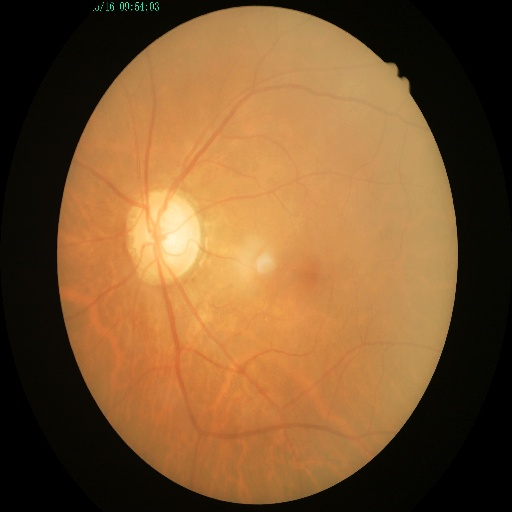

In [ ]:
#Import library
from IPython import display
display.Image(filename='./dataset/glaucoma/1495_left.jpg', width=200, height=150)

In [ ]:
# calculate image pixel mean, min, max

mean = pixels.mean()
print('Mean: %.3f' % mean)
# confirm pixel range is 0-255
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Mean: 86.173
Min: 0.000, Max: 255.000


In [ ]:
import os
import glob
import hashlib
import pandas as pd

def img_hash(images, dir):
    hash_list = []  # list of tuples (filename, hash)
    for image in images:
        with open(image, "rb") as f:
            hash = hashlib.blake2b(f.read()).hexdigest()  # extract hash code
            filename = os.path.basename(image)  # extract subdirectory and filename
            dir_filename = os.path.join(dir, filename)
            hash_list.append((dir_filename, hash))
    hash_df = pd.DataFrame(hash_list, columns=['filename', 'hash'])  # dataframe of filenames & hashes
    return hash_df

In [ ]:
# hash cataract images
cataract_imgs = glob.glob("./dataset/cataract/*.*")
print(img_hash(images=cataract_imgs, dir='cataract')[:3])  # print first three rows of the DataFrame
# assign object to list
cataract_hashdf = img_hash(images=cataract_imgs, dir='cataract')

                    filename  \
0     cataract/2147_left.jpg   
1  cataract/cataract_041.png   
2  cataract/_338_6734383.jpg   

                                                hash  
0  0bf2a00ab50e43af65f19f8cc78f59759a15df7150ed04...  
1  efe1693110bddb4c8fb45d4a9f8db50c67f28f585bb657...  
2  18c07e7bfa63ba3f907f8caa7939436c9968f04c44258c...  


In [ ]:
# hash diabetic retinopathy images
dre_imgs = glob.glob("./dataset/diabetic_retinopathy/*.*")
dre_hashdf = img_hash(images = dre_imgs, dir='dre')

In [ ]:
# hash glaucoma images
glaucoma_imgs = glob.glob("./dataset/glaucoma/*.*")
glaucoma_hashdf = img_hash(images = glaucoma_imgs, dir='glaucoma')

In [ ]:
# hash normal images
normal_imgs = glob.glob("./dataset/normal/*.*")
normal_hashdf = img_hash(images = normal_imgs, dir='normal')

In [ ]:
# join all the hash dataframes together
hash_df = pd.concat([cataract_hashdf, dre_hashdf, glaucoma_hashdf, normal_hashdf], ignore_index=True)
# check hash_list count # should be 4217
len(hash_df)

4217

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__) #2.8.2

2.15.0


In [ ]:
duplicate_hashes = hash_df[hash_df.duplicated('hash', keep=False)] # based on hash codes only
print("Duplicate images based on hashcodes:")
print(duplicate_hashes) # 2 duplicate hashes.

Duplicate images based on hashcodes:
                     filename  \
410   cataract/1415_right.jpg   
463     cataract/625_left.jpg   
2491  glaucoma/1415_right.jpg   
2539    glaucoma/625_left.jpg   

                                                   hash  
410   a029f6e63fa8919142ac8a4c024caf81db515aa44bf4a7...  
463   9b41fcbbbdd4a1429f16d915f026d87f7a94f9a77eb3ef...  
2491  a029f6e63fa8919142ac8a4c024caf81db515aa44bf4a7...  
2539  9b41fcbbbdd4a1429f16d915f026d87f7a94f9a77eb3ef...  


In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(160,160) ,  # needs to be symmetrical
    layers.Rescaling(1./255) # desired height, width in model pipeline
])

result = resize_and_rescale(pixels)
print(result.shape) # new shape, channels

(160, 160, 3)


In [ ]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


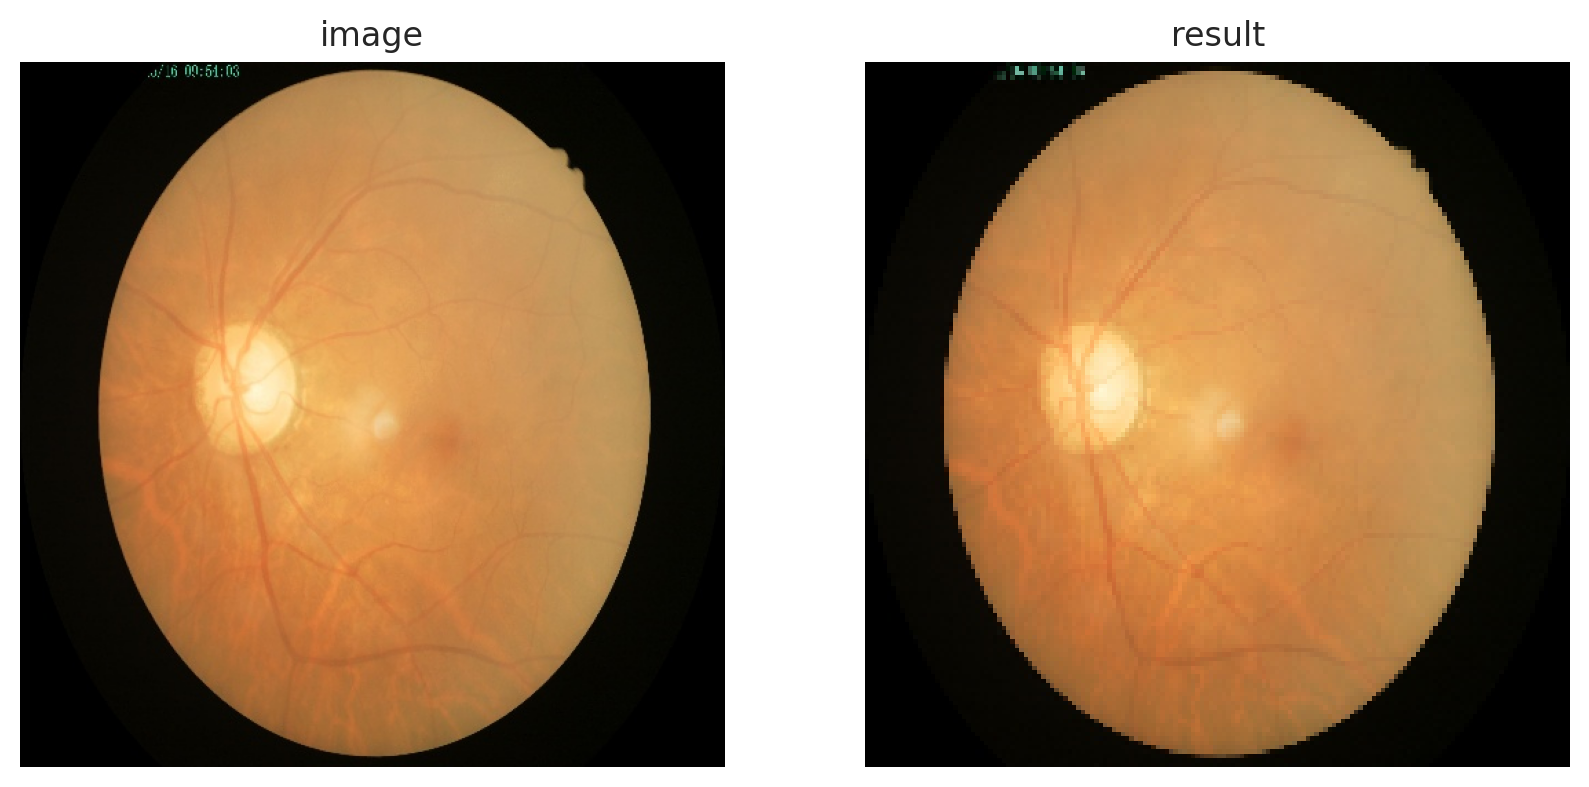

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,8))
ax0.imshow(im)
ax0.axis('off')
ax0.set_title('image')
# after pixel normalisation
ax1.imshow(result)
ax1.axis('off')
ax1.set_title('result')
plt.show() # result seems to have slight blurring of image, but still good definition

In [ ]:
!pip install split-folders

In [ ]:
# first allocate a test set using this library
import splitfolders

splitfolders.ratio('./dataset/', output="./work_directory/", seed=1, ratio=(.5,.25,.25))

Copying files: 4217 files [00:04, 970.71 files/s] 


In [ ]:
# generate dataset that can be used for machine learning
from tensorflow.keras.utils import image_dataset_from_directory

image_size = (160, 160) # very important to get this right, will determine model success
batch_size = 32

train_ds = image_dataset_from_directory(
    './work_directory/train',
    image_size=image_size,
    shuffle=False,
    seed=1,
    batch_size=batch_size,
    label_mode='categorical'
)

val_ds = image_dataset_from_directory(
    './work_directory/val',
    image_size=image_size,
    shuffle=False,
    seed=1,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = image_dataset_from_directory( # for model evaluation later
    './work_directory/test',
    image_size=image_size,
    seed=1,
    shuffle=False,
    batch_size=batch_size,
    label_mode='categorical'
)

Found 2108 files belonging to 4 classes.
Found 1052 files belonging to 4 classes.
Found 1057 files belonging to 4 classes.


In [ ]:
# preview of how images are labelled
class_names = train_ds.class_names
print(class_names)

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


## **Visualise images and labels together**

In [ ]:
# visualise label format # one-hot encoded
for _, labels in train_ds.take(1):
  print(labels[0])
  print(tf.argmax(labels[0], axis=0))
  break

tf.Tensor([1. 0. 0. 0.], shape=(4,), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)


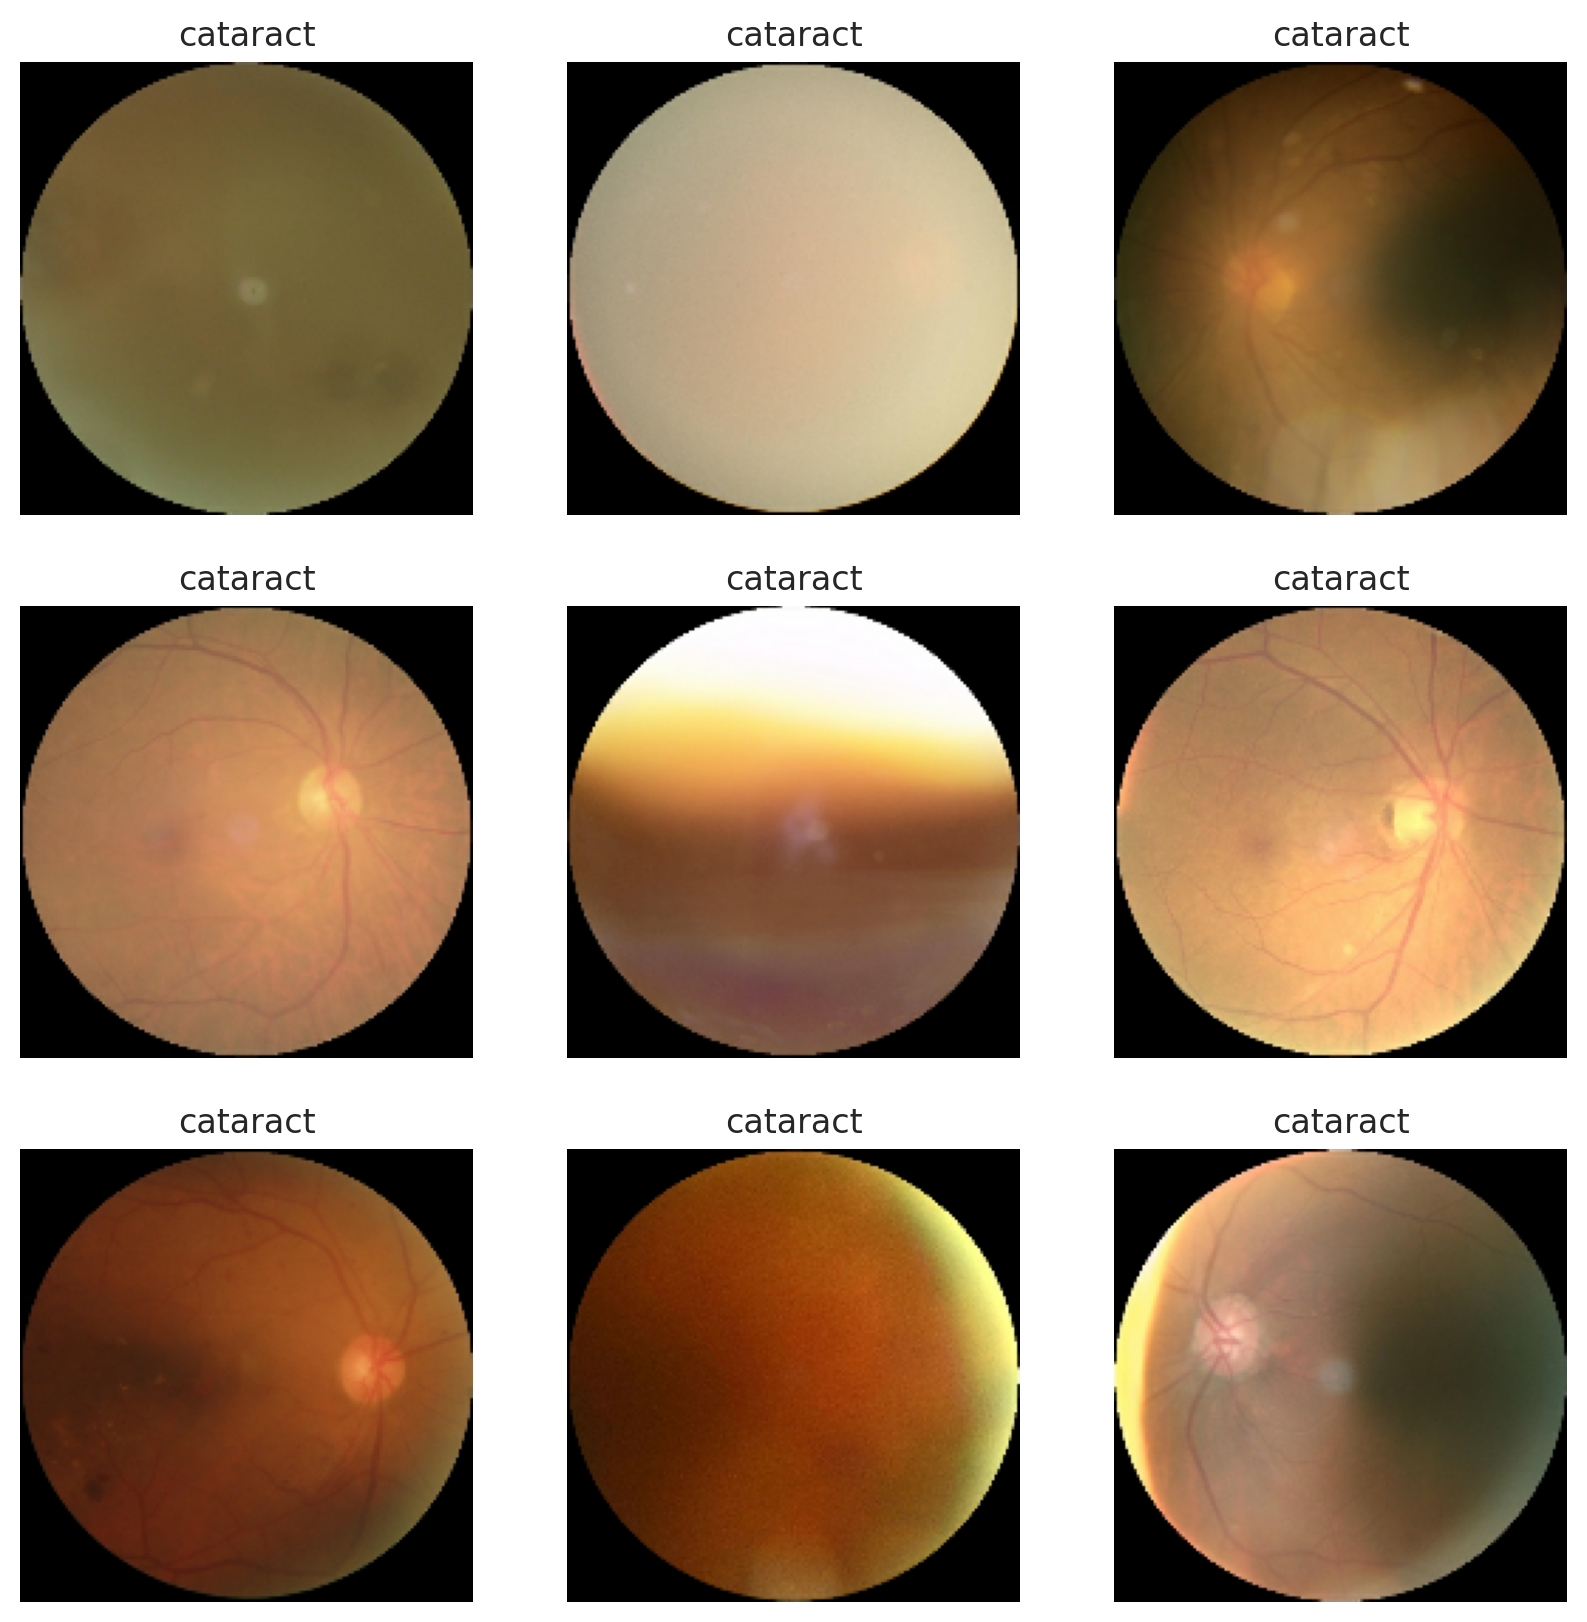

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): # each image 160 x 160
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[tf.argmax(labels[i], axis=0)])
    plt.axis("off")

## **Data augmentation**

In [ ]:
data_augmentation = tf.keras.Sequential(
    [ layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.1),
      layers.RandomContrast(0.1)
    ])

## **Visualise augmented images**

In [ ]:
def augmented_img():
  for image, _ in train_ds.take(1):  # take a sample image from training set
    plt.figure(figsize=(8, 8))
    first_image = image[0]
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
      plt.imshow(augmented_image[0] / 255) # rescale pixel 0 to 1
      plt.axis("off")

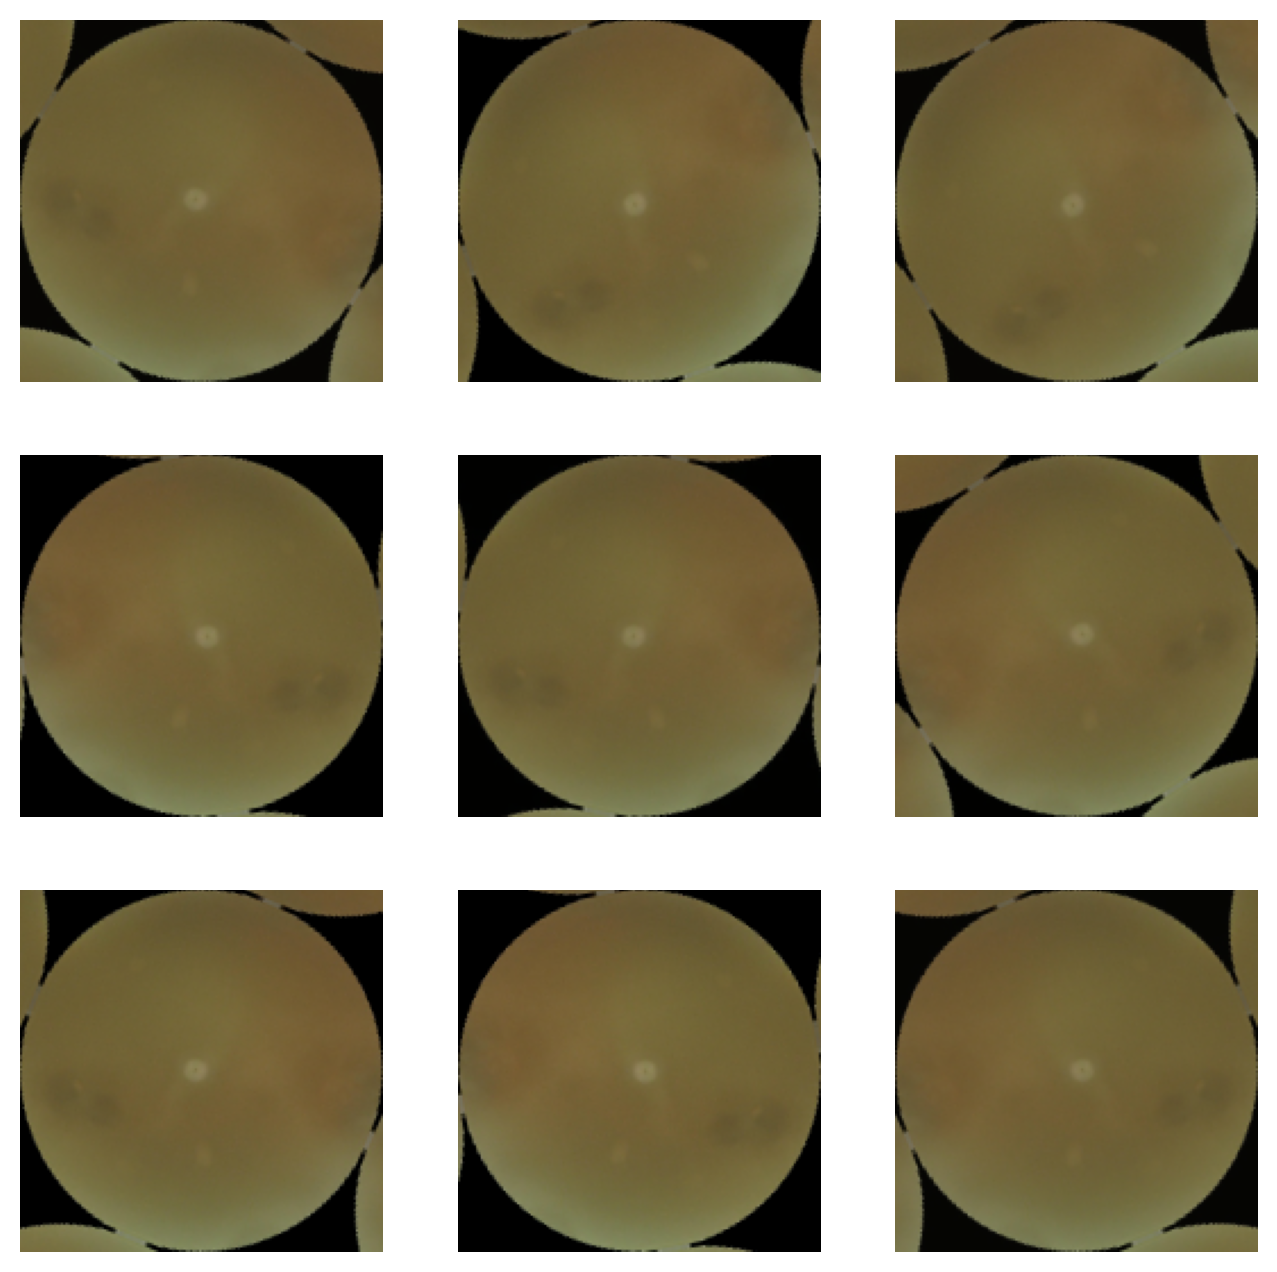

In [ ]:
augmented_img()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

# Define the data augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.1)
])

# Define custom metric function
def f1_score(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1_val

# Define metrics list
METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    f1_score
]

def CustomCNN():
    # Input layer
    inputs = Input(shape=(160, 160, 3))

    # Data augmentation
    x = data_augmentation(inputs)

    # Convolutional layers
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    # Flatten layer
    x = Flatten()(x)

    # Dense layers
    x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.4)(x)

    # Output layer
    outputs = Dense(4, activation='softmax')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile model
    model.compile(tf.keras.optimizers.Adamax(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=METRICS)

    return model

# Create an instance of the custom CNN model
custom_model = CustomCNN()


In [ ]:
# Train the model, doing validation at the end of each epoch.
epochs = 100

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/CSE465 ODR project/CustomCNN_ep{epoch}_val{val_loss:.3f}", save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001, restore_best_weights=True),
    tf.keras.callbacks.CSVLogger('/content/drive/MyDrive/Colab Notebooks/CSE465 ODR project/CustomCNN_history.csv'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, mode='min', min_lr=0.00001)
]

history_custom = custom_model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)


Epoch 1/100
66/66 [==============================] - 42s 490ms/step - loss: 20.9678 - categorical_accuracy: 0.7766 - precision: 0.7815 - recall: 0.7756 - auc: 0.8647 - f1_score: 0.7770 - val_loss: 113.9831 - val_categorical_accuracy: 0.3241 - val_precision: 0.3241 - val_recall: 0.3241 - val_auc: 0.5531 - val_f1_score: 0.3264 - lr: 0.0010
Epoch 2/100
66/66 [==============================] - 15s 233ms/step - loss: 40.0723 - categorical_accuracy: 0.5930 - precision: 0.5930 - recall: 0.5930 - auc: 0.7391 - f1_score: 0.5936 - val_loss: 476.4651 - val_categorical_accuracy: 0.2576 - val_precision: 0.2576 - val_recall: 0.2576 - val_auc: 0.5055 - val_f1_score: 0.2604 - lr: 0.0010
Epoch 3/100
66/66 [==============================] - 15s 224ms/step - loss: 37.0981 - categorical_accuracy: 0.5432 - precision: 0.5432 - recall: 0.5432 - auc: 0.7092 - f1_score: 0.5438 - val_loss: 139.1708 - val_categorical_accuracy: 0.2928 - val_precision: 0.2928 - val_recall: 0.2928 - val_auc: 0.5291 - val_f1_score: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

# Define the data augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.1)
])

# Define custom metric function
def f1_score(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1_val

# Define metrics list
METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    f1_score
]

def CustomCNN():
    # Input layer
    inputs = Input(shape=(160, 160, 3))

    # Data augmentation
    x = data_augmentation(inputs)

    # Rescaling layer
    x = Rescaling(1./255)(x)

    # Convolutional layers
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    # Flatten layer
    x = Flatten()(x)

    # Dense layers
    x = Dense(256,
              kernel_regularizer=regularizers.l2(0.016),
              activity_regularizer=regularizers.l1(0.006),
              bias_regularizer=regularizers.l1(0.006),
              activation='relu')(x)
    x = Dropout(0.4)(x)

    # Output layer
    outputs = Dense(4, activation='softmax')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile model
    model.compile(tf.keras.optimizers.Adamax(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=METRICS)

    return model

# Create an instance of the custom CNN model
custom_model = CustomCNN()


In [ ]:
# Train the model, doing validation at the end of each epoch.
epochs = 200

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/CSE465 ODR project/CustomCNNnew_ep{epoch}_val{val_loss:.3f}", save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001, restore_best_weights=True),
    tf.keras.callbacks.CSVLogger('/content/drive/MyDrive/Colab Notebooks/CSE465 ODR project/CustomCNNnew_history.csv'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, mode='min', min_lr=0.00001)
]

history_custom = custom_model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)


Epoch 1/200
66/66 [==============================] - 31s 391ms/step - loss: 9.8930 - categorical_accuracy: 0.5503 - precision: 0.6904 - recall: 0.5014 - auc: 0.7934 - f1_score: 0.5482 - val_loss: 11.3283 - val_categorical_accuracy: 0.2462 - val_precision: 0.2462 - val_recall: 0.2462 - val_auc: 0.4456 - val_f1_score: 0.2453 - lr: 0.0010
Epoch 2/200
66/66 [==============================] - 19s 291ms/step - loss: 8.2827 - categorical_accuracy: 0.5489 - precision: 0.5874 - recall: 0.4350 - auc: 0.7354 - f1_score: 0.4921 - val_loss: 9.3179 - val_categorical_accuracy: 0.3108 - val_precision: 0.3016 - val_recall: 0.2348 - val_auc: 0.5210 - val_f1_score: 0.2695 - lr: 0.0010
Epoch 3/200
66/66 [==============================] - 18s 282ms/step - loss: 6.3184 - categorical_accuracy: 0.3510 - precision: 0.4995 - recall: 0.2187 - auc: 0.6673 - f1_score: 0.2723 - val_loss: 6.2729 - val_categorical_accuracy: 0.2671 - val_precision: 0.2726 - val_recall: 0.2671 - val_auc: 0.5517 - val_f1_score: 0.2665 -

## **Learning Curves**

In [ ]:
import pandas as pd
history = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSE465 ODR project/CustomCNNnew_history.csv')
history.head(3)

epoch       auc  categorical_accuracy  f1_score      loss  precision  \
0      0  0.793358              0.550285  0.548188  9.892964   0.690398   
1      1  0.735411              0.548862  0.492073  8.282716   0.587444   
2      2  0.667274              0.351044  0.272267  6.318406   0.499458   

     recall   val_auc  val_categorical_accuracy  val_f1_score   val_loss  \
0  0.501423  0.445606                  0.246198      0.245265  11.328278   
1  0.435009  0.521006                  0.310836      0.269469   9.317904   
2  0.218691  0.551676                  0.267110      0.266534   6.272867   

   val_precision  val_recall  
0       0.246198    0.246198  
1       0.301587    0.234791  
2       0.272551    0.267110

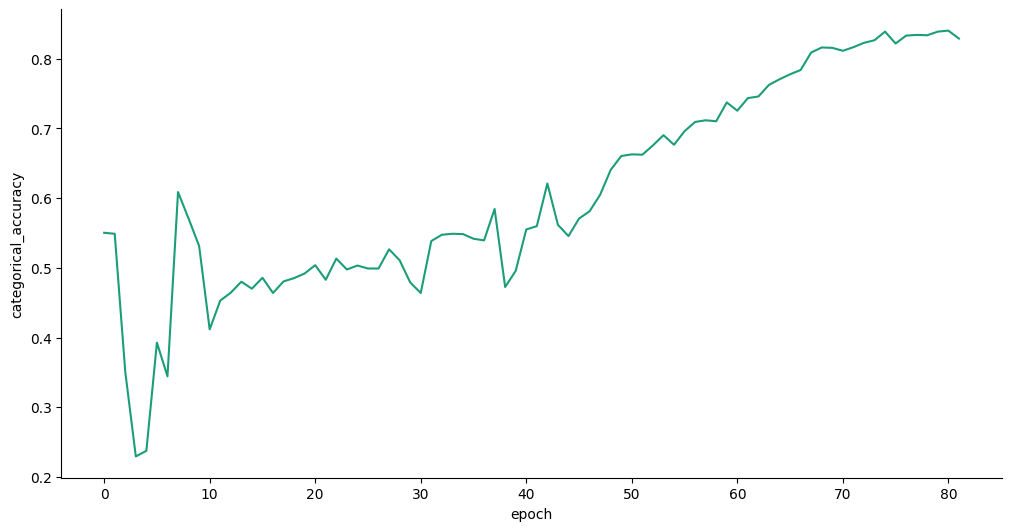

In [ ]:
# @title epoch vs categorical_accuracy

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['epoch']
  ys = series['categorical_accuracy']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = history.sort_values('epoch', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('epoch')
_ = plt.ylabel('categorical_accuracy')

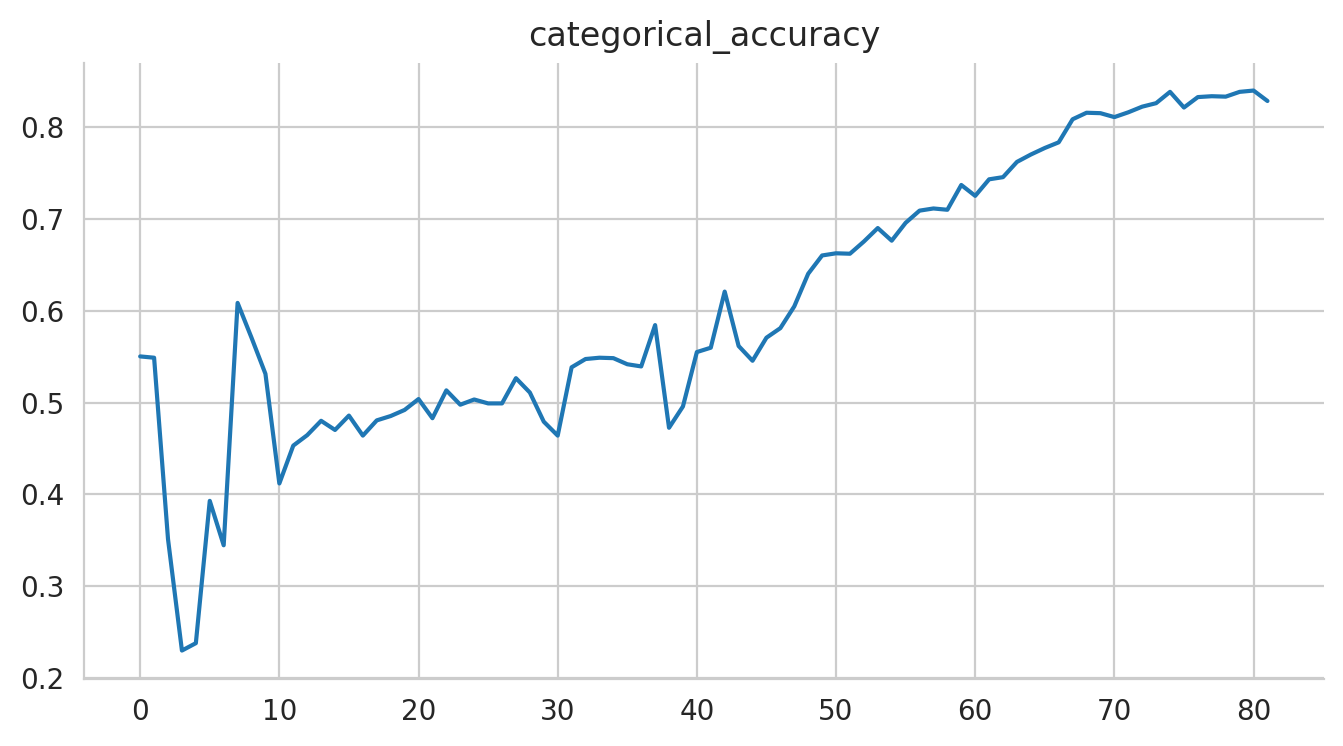

In [ ]:
# @title categorical_accuracy

from matplotlib import pyplot as plt
history['categorical_accuracy'].plot(kind='line', figsize=(8, 4), title='categorical_accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

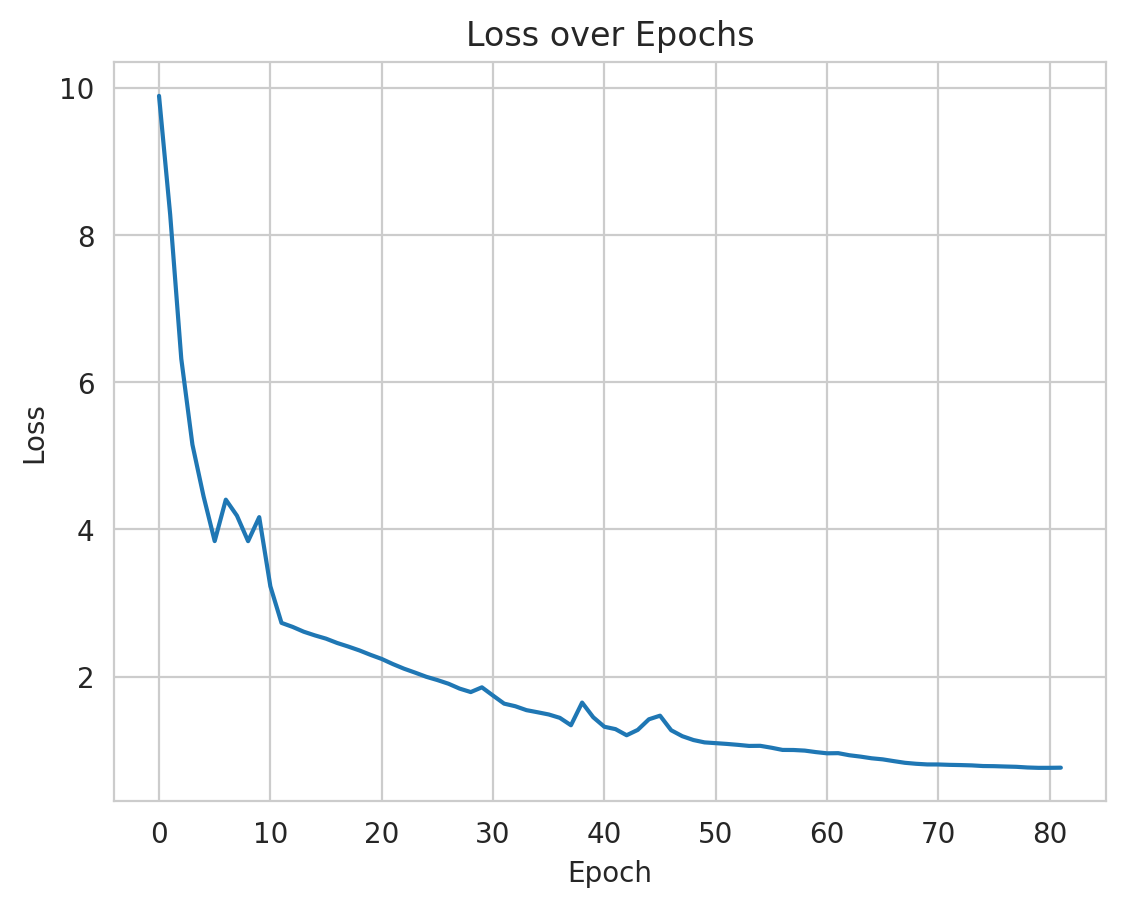

In [ ]:
# @title Loss over Epochs

import matplotlib.pyplot as plt
plt.plot(history['epoch'], history['loss'])
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
_ = plt.ylabel('Loss')

<Axes: xlabel='epoch', ylabel='auc'>

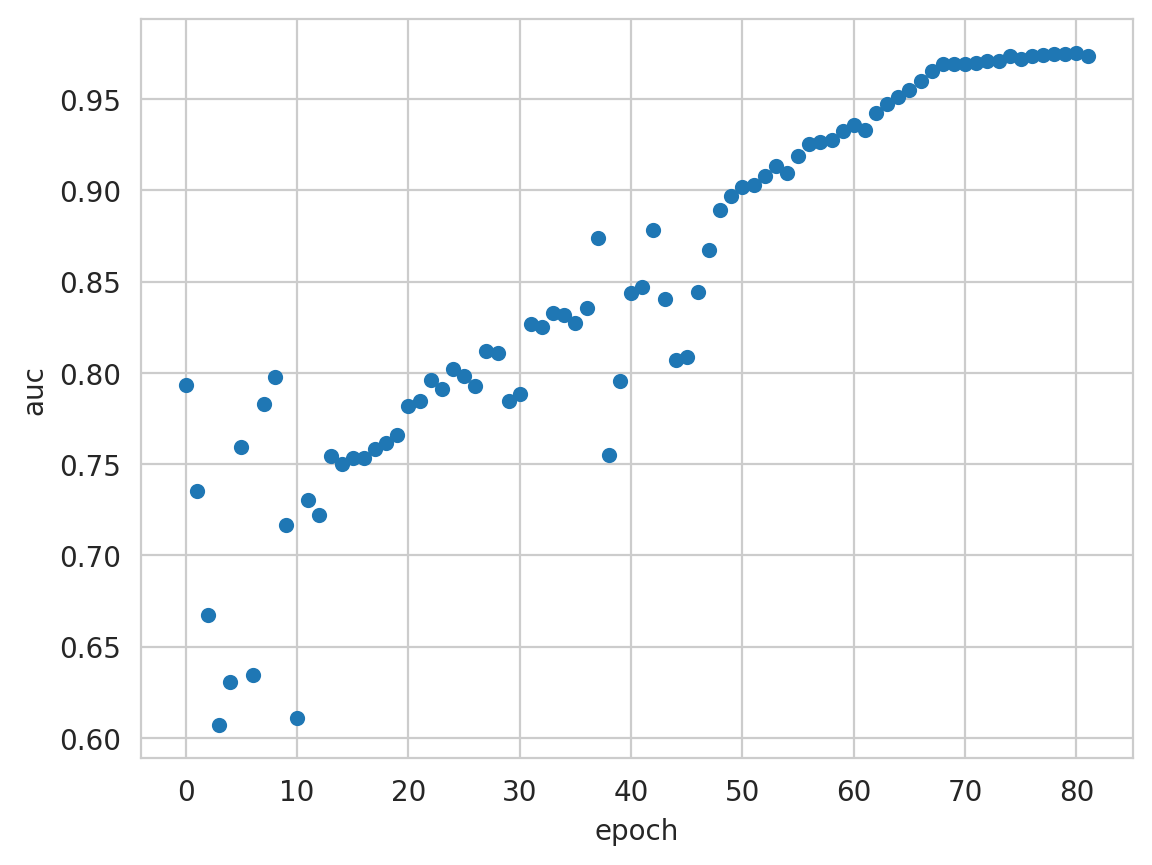

In [ ]:
# prompt: Using dataframe history:

history.plot.scatter(x="epoch", y="auc")


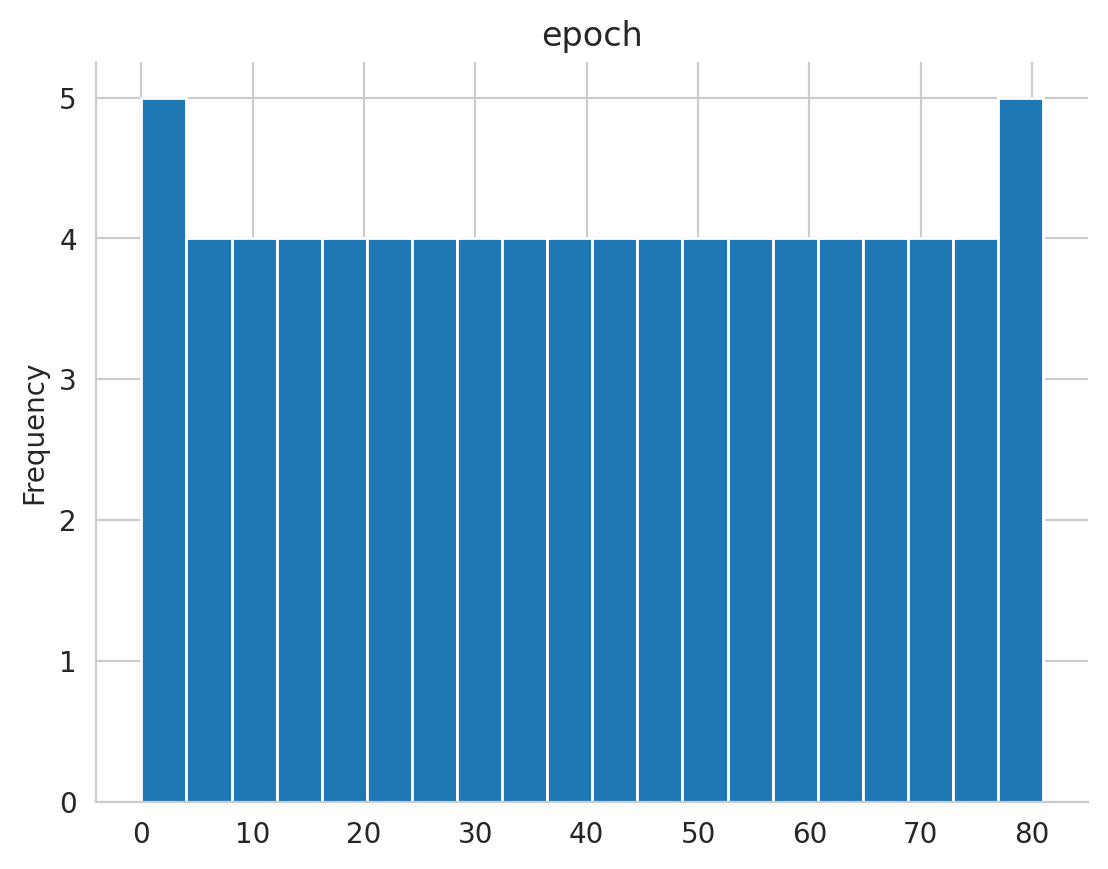

In [ ]:
# @title epoch

from matplotlib import pyplot as plt
history['epoch'].plot(kind='hist', bins=20, title='epoch')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
acc = history['categorical_accuracy']
val_acc = history['val_categorical_accuracy']

loss = history['loss']
val_loss = history['val_loss']

In [ ]:
def learning_curves(acc,val_acc,loss,val_loss):
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),max(plt.ylim())])
  plt.xlim([0,max(plt.xlim())])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([min(plt.ylim()),max(plt.ylim())])
  plt.xlim([0,max(plt.xlim())])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()
  return plt.show()

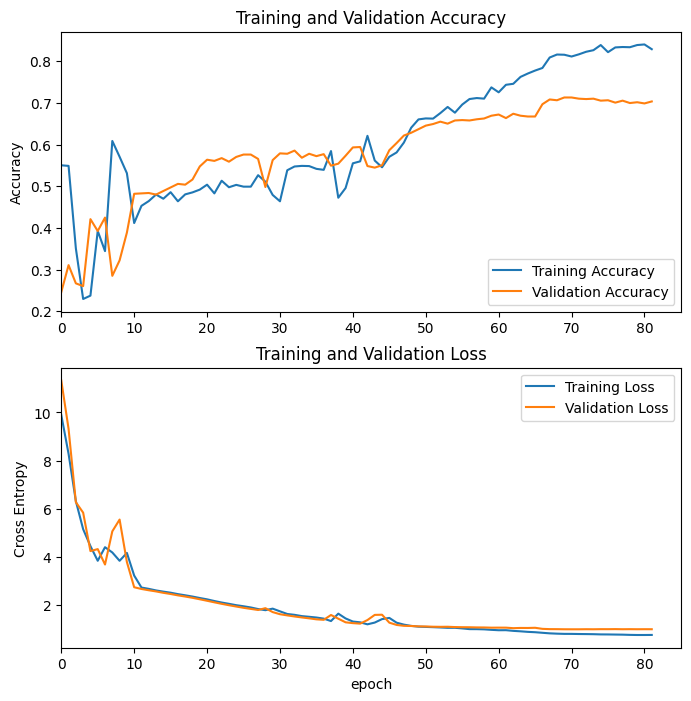

In [ ]:
learning_curves(acc,val_acc,loss,val_loss)

In [ ]:
def metrics(epoch_num):
  val_auc = history.loc[history['epoch']==epoch_num, ['val_auc']].values[0][0]
  auc = history.loc[history['epoch']==epoch_num, ['auc']].values[0][0]
  auc_diff = (auc - val_auc)*100 / auc
  print('AUC percentage difference is:', abs(auc_diff), '%')

  val_acc = history.loc[history['epoch']==epoch_num, ['val_categorical_accuracy']].values[0][0]
  acc = history.loc[history['epoch']==epoch_num, ['categorical_accuracy']].values[0][0]
  acc_diff = (acc - val_acc)*100 / acc
  print()
  print('Accuracy percentage difference is:', abs(acc_diff), '%')

In [ ]:
# check for generalisation using epoch 72
metrics(epoch_num=71)

AUC percentage difference is: 5.11928736698819 %

Accuracy percentage difference is: 13.02496694932405 %


Restoring model weights from the end of the best epoch: 72.
66/66 [==============================] - 15s 227ms/step - loss: 0.7622 - categorical_accuracy: 0.8287 - precision: 0.9114 - recall: 0.7173 - auc: 0.9734 - f1_score: 0.7747 - val_loss: 0.9992 - val_categorical_accuracy: 0.7034 - val_precision: 0.8117 - val_recall: 0.5656 - val_auc: 0.9172 - val_f1_score: 0.6439 - lr: 1.0000e-05
Epoch 82: early stopping

Adding data augmentation layers to the EfficientNet model resulted in model requiring more epochs to learn, but achieve slightly better generalisation. Using model at **epoch 78**, the validation metrics are as follows:

| Name               |   Scores   |
|:-------------------|:----------:|
|**AUC**                 |**1.0000**|
|**Categorical Accuracy**|**1.0000**|
|**F1 score**            |**0.9995**|
|**Loss**                |**0.1888**|
|**Precision**           |**1.0000**|
|**Recall**              |**0.9991**|


## **Evaluation**


In [ ]:
# choose model for evaluation
# load model
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/CSE465 ODR project/custom02/CustomCNNnew_ep72_val0.997",
                                   custom_objects={'f1_score': f1_score})

### **Confusion matrix**


In [ ]:
# get predictions for confusion matrix
# class_names = train_ds.class_names # from previous cell
print(class_names)

print('===== test_ds predictions =====')
test_preds = model.predict(test_ds, verbose=1) # get test_ds predictions
# sample test_ds predictions
print(test_preds[2])
for array in [test_preds[2]]:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

print() #gap

print('===== train_ds predictions =====')
train_preds = model.predict(train_ds, verbose=1) # get train_ds predictions
# sample train_ds predictions
print(train_preds[:1])
for array in train_preds:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

print() #gap

print('===== val_ds predictions =====')
val_preds = model.predict(val_ds, verbose=1) # get val_ds predictions
# sample val_ds predictions
print(val_preds[:1])
for array in val_preds:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
===== test_ds predictions =====
34/34 [==============================] - 6s 126ms/step
[0.13460614 0.04452028 0.3074548  0.5134188 ]
cataract probability is: 0.1346
diabetic_retinopathy probability is: 0.0445
glaucoma probability is: 0.3075
normal probability is: 0.5134

===== train_ds predictions =====
66/66 [==============================] - 10s 153ms/step
[[0.23354693 0.02433511 0.3032468  0.43887118]]
cataract probability is: 0.2335
diabetic_retinopathy probability is: 0.0243
glaucoma probability is: 0.3032
normal probability is: 0.4389

===== val_ds predictions =====
33/33 [==============================] - 4s 115ms/step
[[0.14700902 0.02725574 0.255616   0.57011926]]
cataract probability is: 0.1470
diabetic_retinopathy probability is: 0.0273
glaucoma probability is: 0.2556
normal probability is: 0.5701


In [ ]:
y_pred_probs = np.max(test_preds, axis=-1) # store probabilities of predictions for later use

In [ ]:
y_proba = test_preds # store all probabilities for later use in ROC curve
print(y_proba[:, 0][:3]) # predicted probability of cataract

[0.21829566 0.18295076 0.13460614]


#####**OHE predictions:**

In [ ]:
# convert prediction probabilities into ohe
# for confusion matrix

# for test_ds
idx = np.argmax(test_preds, axis=-1)
test_preds = np.zeros( test_preds.shape )
test_preds[ np.arange(test_preds.shape[0]), idx] = 1

#print(train_preds.argmax(axis=1))
#print(train_labels.argmax(axis=1))

# for train_ds
idx = np.argmax(train_preds, axis=-1)
train_preds = np.zeros( train_preds.shape )
train_preds[ np.arange(train_preds.shape[0]), idx] = 1

# for val_ds
idx = np.argmax(val_preds, axis=-1)
val_preds = np.zeros( val_preds.shape )
val_preds[ np.arange(val_preds.shape[0]), idx] = 1

print('Predicted test_ds labels:', test_preds[:5])
print() # gap
print('Predicted train_ds labels:', train_preds[:5])
print() # gap
print('Predicted val_ds labels:', val_preds[:5])

Predicted test_ds labels: [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

Predicted train_ds labels: [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

Predicted val_ds labels: [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


##### **Extracting true labels:**

In [ ]:
# extract true labels and images from test_ds
test_labels = np.concatenate([y for x, y in test_ds], axis=0)
test_images = np.concatenate([x for x, y in test_ds], axis=0)

# extract true labels and images from train_ds
train_labels = np.concatenate([y for x, y in train_ds], axis=0)
train_images = np.concatenate([x for x, y in train_ds], axis=0)

# extract true labels and images from val_ds
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_images = np.concatenate([x for x, y in val_ds], axis=0)

print('===== Test set true labels =====')
print(test_labels[:5])
print() # gap
print('===== Train set true labels =====')
print(train_labels[:5])
print() # gap
print('===== Validation set true labels =====')
print(val_labels[:5])

===== Test set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

===== Train set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

===== Validation set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


##### **Plot confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix for test_ds predictions
test_cm = confusion_matrix(test_labels.argmax(axis=1), test_preds.argmax(axis=1))
# Creating a confusion matrix for train_ds predictions
train_cm = confusion_matrix(train_labels.argmax(axis=1), train_preds.argmax(axis=1))
# Creating a confusion matrix for val_ds predictions
val_cm = confusion_matrix(val_labels.argmax(axis=1), val_preds.argmax(axis=1))

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
test_cm_df = pd.DataFrame(test_cm,
                          index = class_names,
                          columns = class_names)
train_cm_df = pd.DataFrame(train_cm,
                           index = class_names,
                           columns = class_names)
val_cm_df = pd.DataFrame(val_cm,
                         index = class_names,
                         columns = class_names)

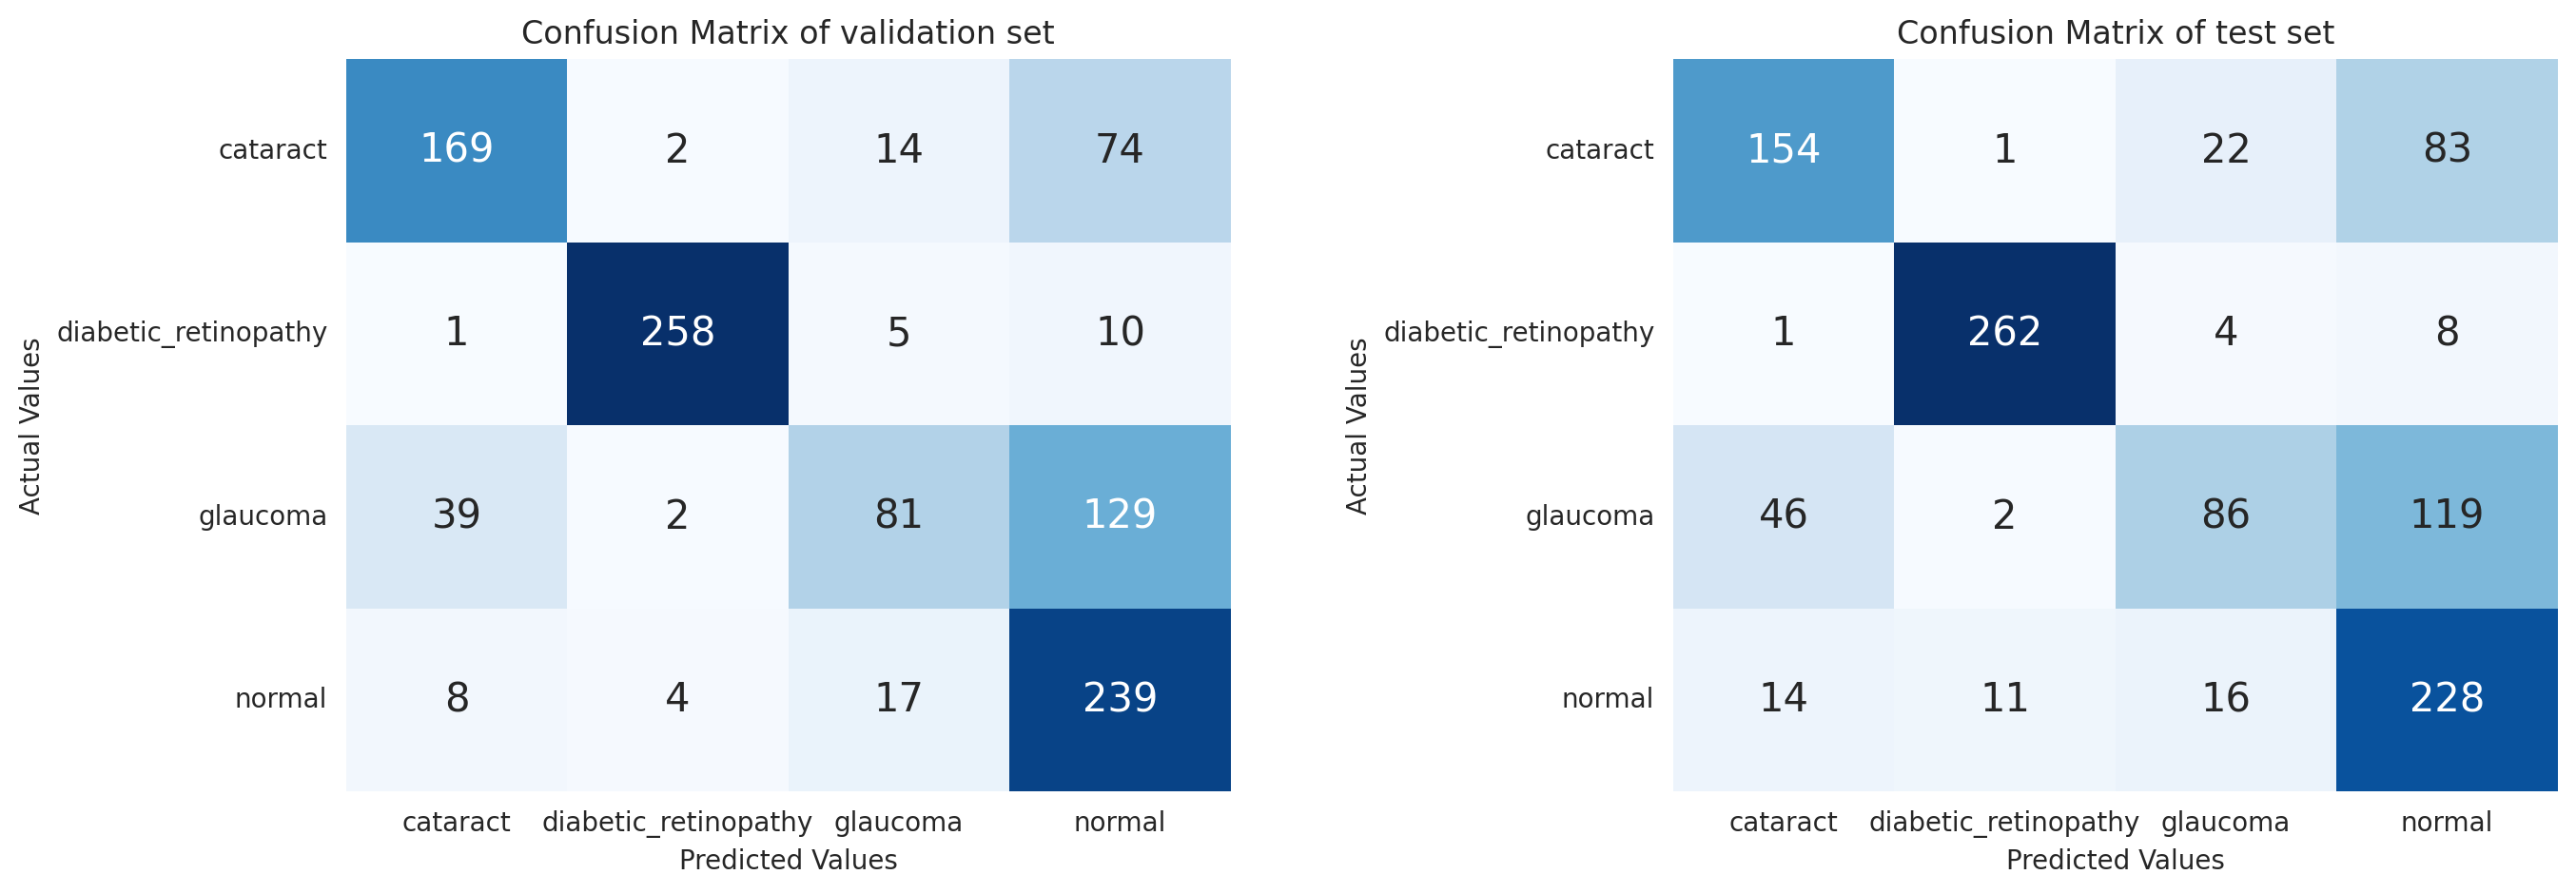

In [ ]:
#Plotting confusion matrices using heatmap
fig, axes = plt.subplots(1, 2, figsize=(15,5))
#sns.heatmap(train_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[0])
#axes[0].set_title('Confusion Matrix of train set')
#axes[0].set_ylabel('Actual Values')
#axes[0].set_xlabel('Predicted Values')

sns.heatmap(val_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[0])
axes[0].set_title('Confusion Matrix of validation set')
axes[0].set_ylabel('Actual Values')
axes[0].set_xlabel('Predicted Values')

sns.heatmap(test_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[1])
axes[1].set_title('Confusion Matrix of test set')
axes[1].set_ylabel('Actual Values')
axes[1].set_xlabel('Predicted Values')

plt.subplots_adjust(wspace=0.5)

plt.show()

### **Classification report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, test_preds, target_names=class_names, digits= 4))

                      precision    recall  f1-score   support

            cataract     0.7163    0.5923    0.6484       260
diabetic_retinopathy     0.9493    0.9527    0.9510       275
            glaucoma     0.6719    0.3399    0.4514       253
              normal     0.5205    0.8476    0.6450       269

           micro avg     0.6906    0.6906    0.6906      1057
           macro avg     0.7145    0.6831    0.6740      1057
        weighted avg     0.7165    0.6906    0.6791      1057
         samples avg     0.6906    0.6906    0.6906      1057



## **Misclassified test images**

In [ ]:
# extract test file names from test_ds
# this cannot do with tensorflow datasets that are prefetched autotuned
test_filenames = test_ds.file_paths

In [ ]:
len(test_filenames)

1057

In [ ]:
class_names

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [ ]:
# convert OHE to interger version of class_names for easier comparison
y_true = tf.argmax(test_labels, axis=1).numpy() # tensor object not iterable, use numpy to convert to list
y_pred = tf.argmax(test_preds, axis=1).numpy()
print('First 5 true labels:', y_true[:5])
print('First 5 predictions:', y_pred[:5])

error_list = []

for a, b, c, d in zip(y_true, y_pred, y_pred_probs, test_filenames):
  if a != b:
    error_list.append((class_names[a],class_names[b],c,d))

First 5 true labels: [0 0 0 0 0]
First 5 predictions: [3 3 3 3 3]


In [ ]:
len(error_list)

327

In [ ]:
print('Prediction accuracy on test data:', 100 - (len(error_list)*100/len(test_filenames)), '%')

Prediction accuracy on test data: 69.06338694418164 %


### **Looking into specific images that were misclassified**

In [ ]:
error_list[:5] # check for duplicates

[('cataract',
  'normal',
  0.4461979,
  './work_directory/test/cataract/103_left.jpg'),
 ('cataract',
  'normal',
  0.34623924,
  './work_directory/test/cataract/1084_right.jpg'),
 ('cataract',
  'normal',
  0.5134188,
  './work_directory/test/cataract/1102_left.jpg'),
 ('cataract',
  'normal',
  0.40751317,
  './work_directory/test/cataract/112_right.jpg'),
 ('cataract',
  'normal',
  0.377087,
  './work_directory/test/cataract/1164_left.jpg')]

In [ ]:
def print_in_color(txt_msg,fore_tupple=(0,255,255),back_tupple=(100,100,100)):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    # default parameter print in cyan foreground and gray background
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m'
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

# example default print
msg='test of default colors'
print_in_color(msg)

test of default colors



In [ ]:
import re

print ('Below is a list of test files that were misclassified \n')
msg='{0:^10}{1:^30s}{2:^20s}{3:^20s}{4:^15s}'.format('No.','Test File','True Label','Predicted as','Probability')
print_in_color(msg)

for i, (a, b, c, d) in enumerate(error_list):
  x = re.split('./work_directory/test/', d)[-1]
  print('{0:^10}{1:^30s}{2:^20s}{3:^20s}  {4:.4f}'.format(i+1,x,a,b,c))

Below is a list of test files that were misclassified 

   No.              Test File                True Label         Predicted as      Probability  

    1         cataract/103_left.jpg           cataract             normal         0.4462
    2        cataract/1084_right.jpg          cataract             normal         0.3462
    3         cataract/1102_left.jpg          cataract             normal         0.5134
    4         cataract/112_right.jpg          cataract             normal         0.4075
    5         cataract/1164_left.jpg          cataract             normal         0.3771
    6         cataract/119_left.jpg           cataract             normal         0.6260
    7        cataract/1415_right.jpg          cataract             normal         0.5241
    8         cataract/1435_left.jpg          cataract            glaucoma        0.3935
    9        cataract/1454_right.jpg          cataract             normal         0.4621
    10        cataract/1456_left.jpg          

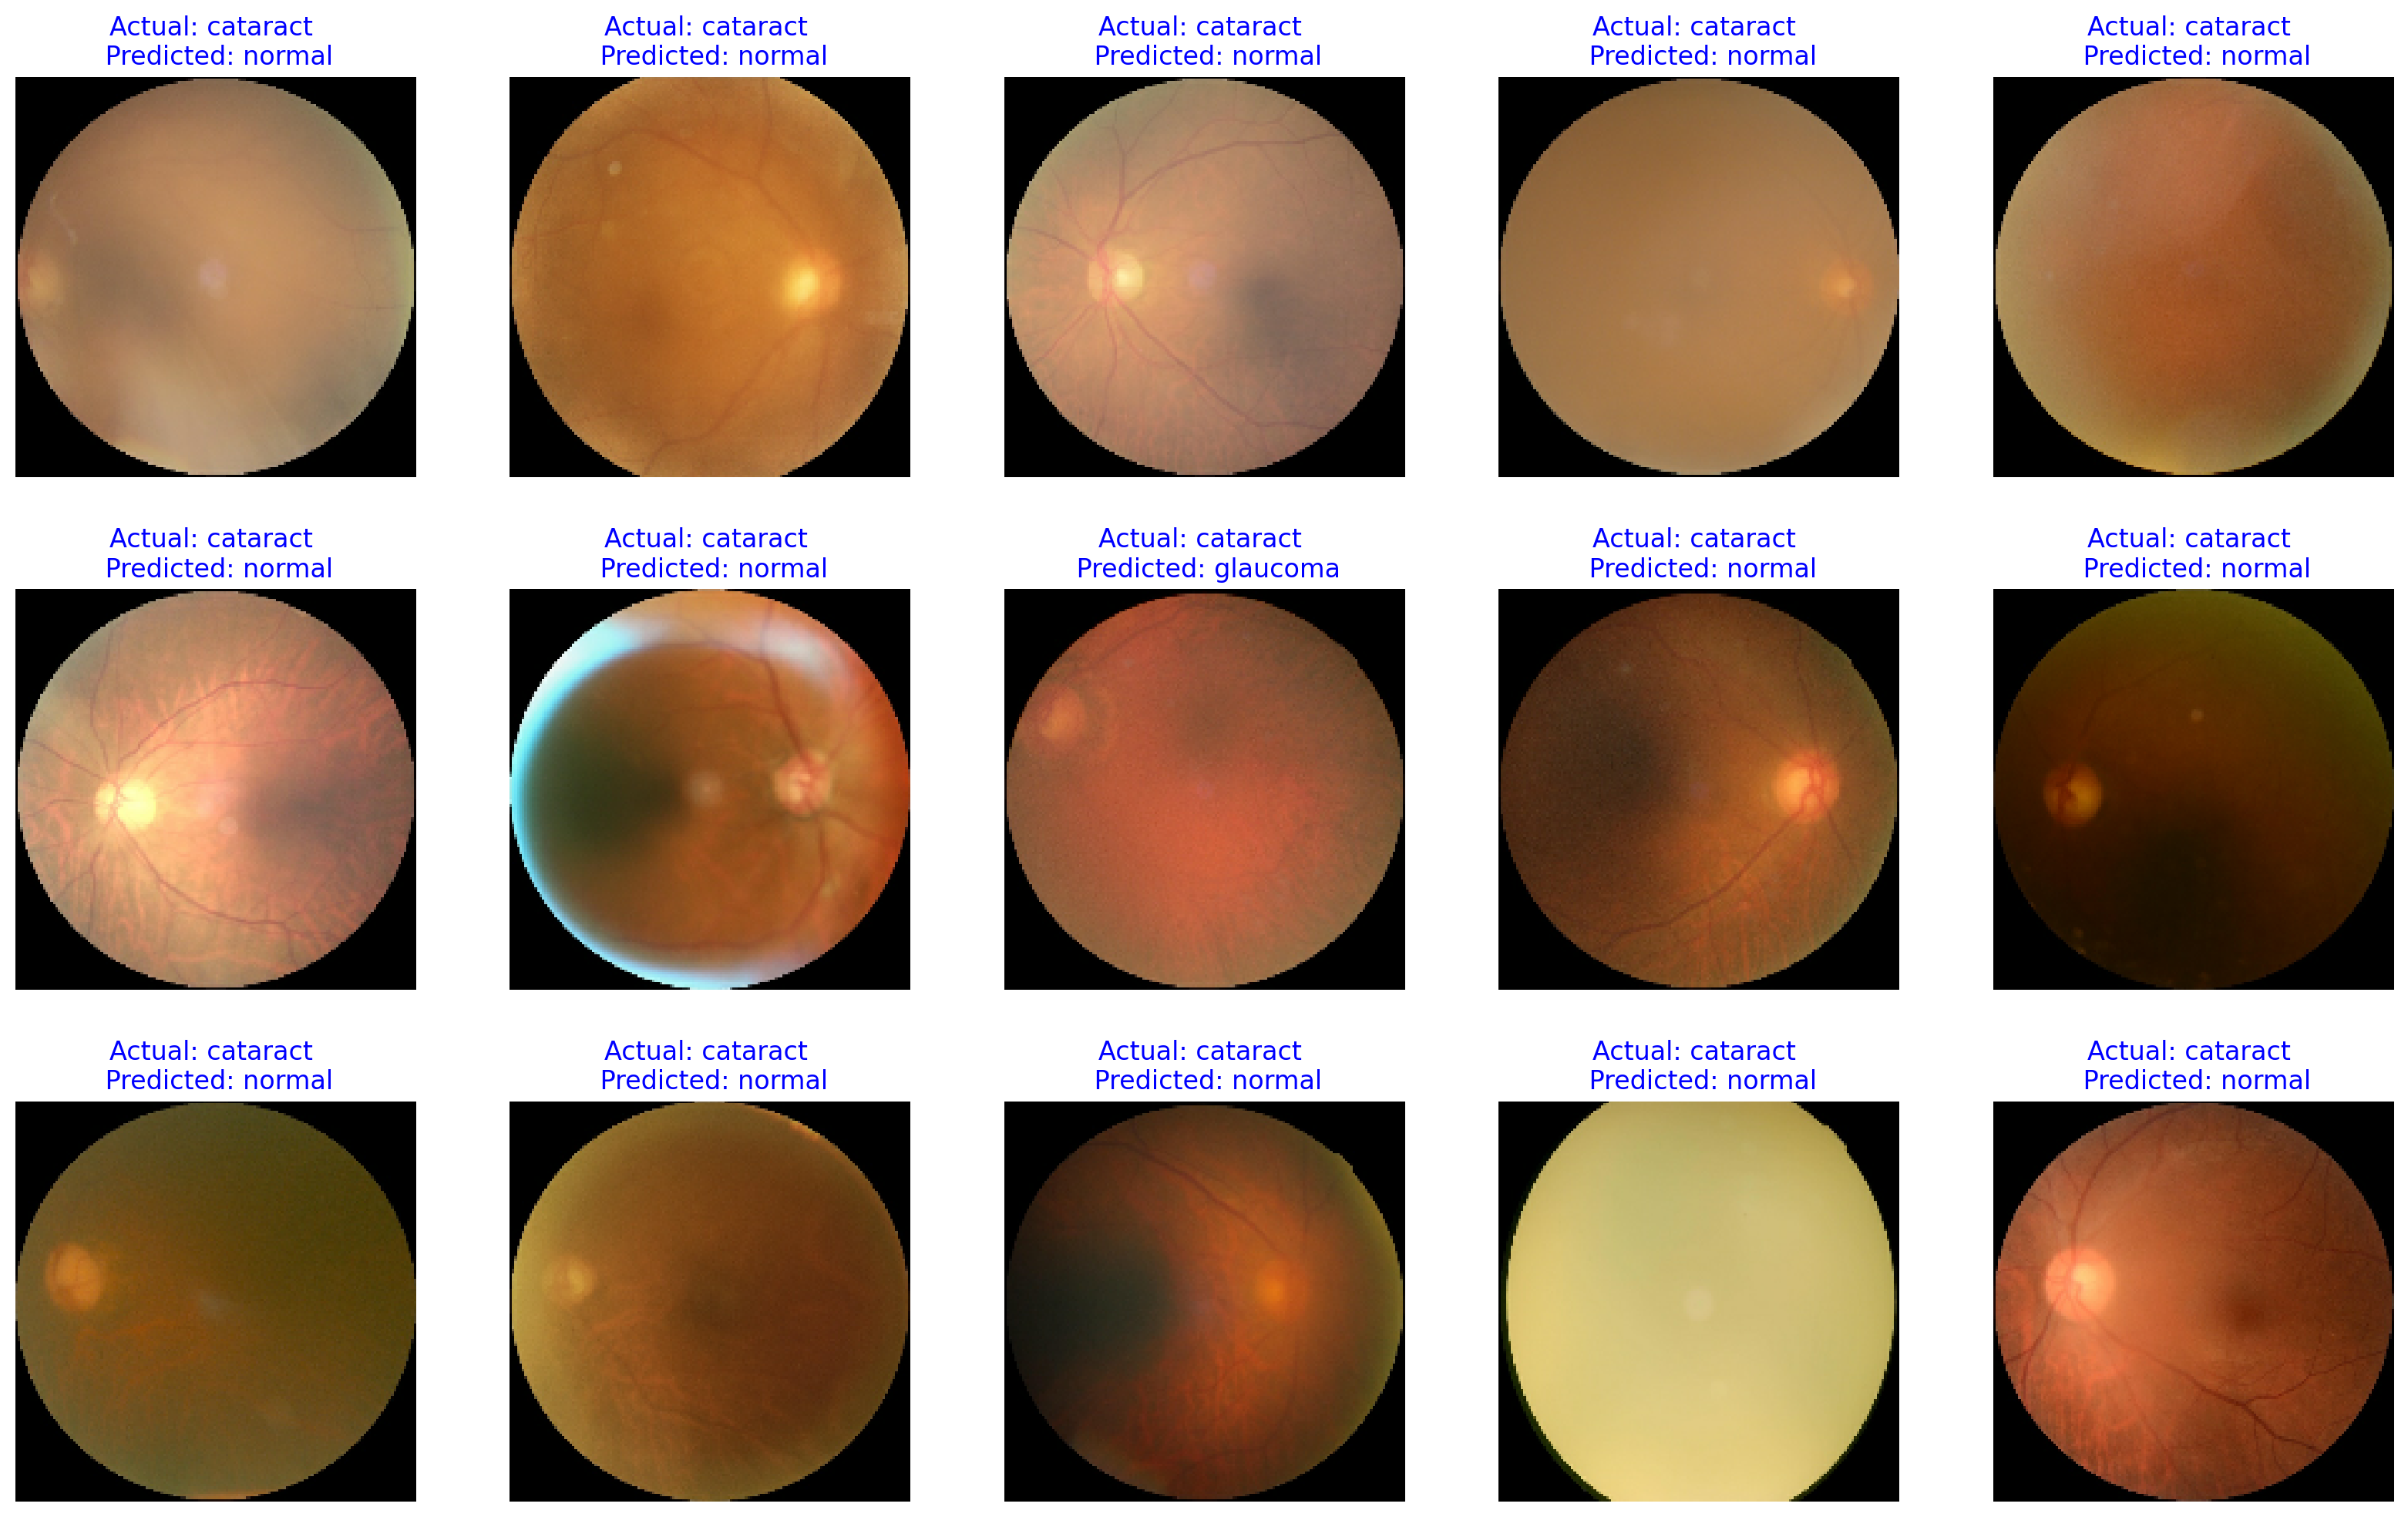

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list called error_list containing (actual, predicted) pairs
# and test_images containing your test images

fig, axes = plt.subplots(3, 5, figsize=(20, 12)) # 3 rows, 5 cols

def axes_img(r, c, i):
    if i < len(error_list):
        axes[r, c].imshow(test_images[i].astype('uint8'))
        axes[r, c].axis('off')
        axes[r, c].set_title(f'Actual: {error_list[i][0]} \n Predicted: {error_list[i][1]}', color='blue')

# Loop through rows and columns to display images
for r in range(3):
    for c in range(5):
        i = r * 5 + c
        axes_img(r, c, i)

plt.subplots_adjust(hspace=0.28) # add space between rows
plt.show()
